In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 


In [2]:
df = pd.read_csv('Data\IBM-Watson.csv')
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)
df = df.rename(columns={'Customer Lifetime Value':'CLV'})
df.head()

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2002/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<font size=5>Explorative analysis

<AxesSubplot:xlabel='CLV'>

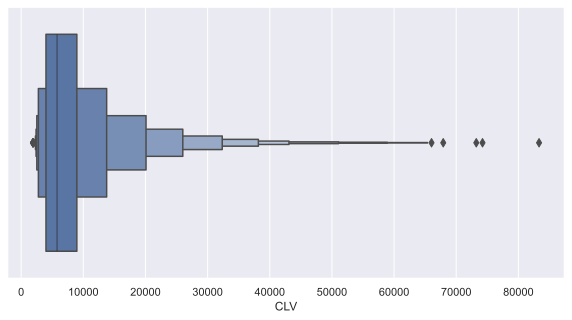

In [3]:
plt.figure(figsize=(10,5))
sns.boxenplot(x=df["CLV"])

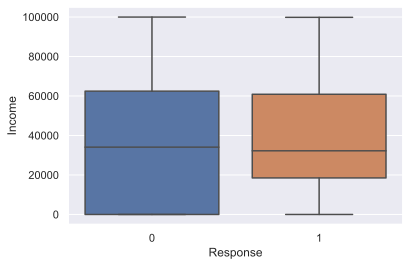

In [4]:
plt.figure(dpi=100)
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.show()

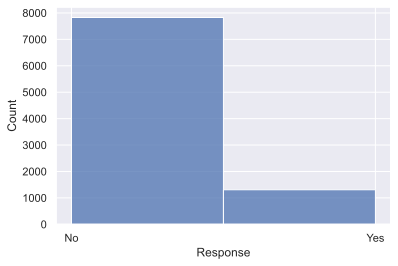

In [5]:
plt.figure(dpi=100)
sns.histplot(data=df,x='Response',bins=2)
plt.xticks([0,1],['No','Yes'])
plt.show()

<AxesSubplot:xlabel='Education', ylabel='CLV'>

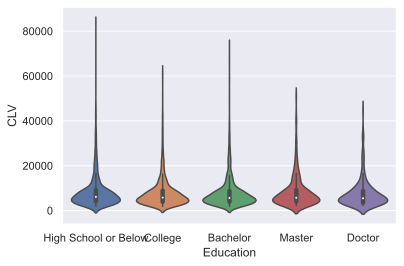

In [6]:
plt.figure(dpi=80)
# edu_order = ['']
edu_order=['High School or Below','College','Bachelor','Master','Doctor']
sns.violinplot(x='Education',y='CLV',data=df,order=['High School or Below','College','Bachelor','Master','Doctor'])

<AxesSubplot:xlabel='Location Code', ylabel='CLV'>

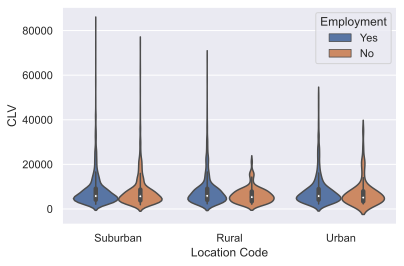

In [7]:
df['Employment'] = df['EmploymentStatus'].apply(lambda x: 'No' if x=='Unemployed' else 'Yes')
plt.figure(dpi=80)
sns.violinplot(x='Location Code',y='CLV',hue='Employment',data=df)

<AxesSubplot:xlabel='Vehicle Class', ylabel='CLV'>

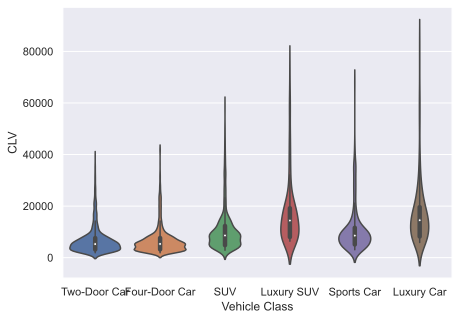

In [3]:
plt.figure(dpi=80,figsize=(7,5))
sns.violinplot(x='Vehicle Class',y='CLV',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

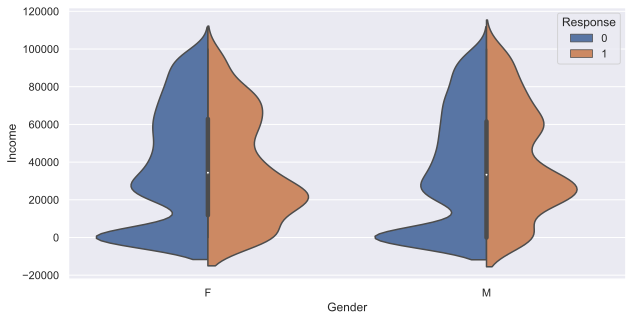

In [9]:
plt.figure(figsize=(10,5))
# sns.violinplot(x="Education",y="Income",data=df,hue="Response",split=True,scale_hue=False,order=edu_order) 
# ax=sns.violinplot(x="Education",y="Income",data=df,hue="Response",split=False,scale_hue=True,ax=axes[1]) #下图
sns.violinplot(x='Gender',y='Income',hue='Response',data=df,split=True)

<font size = 5>Logistic Regression

In [10]:
import statsmodels.api as sm
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.nunique()
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                -0.02546
Time:                        11:29:57   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CLV                           -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

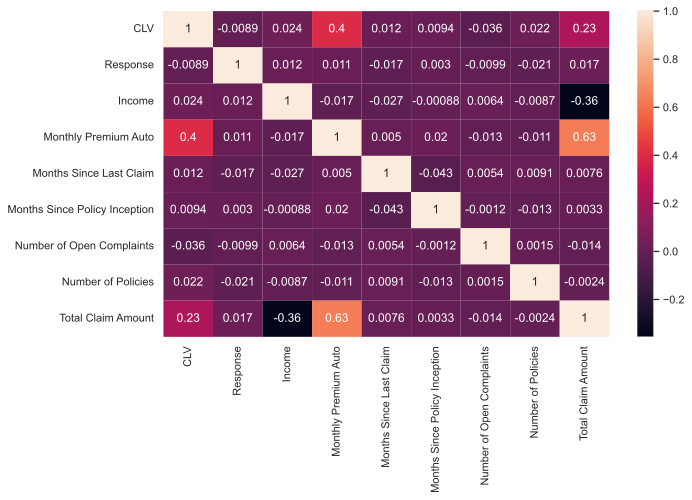

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()

Categorical variables

In [12]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df.columns:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [13]:
categorical_train = sm.Logit(continous_var_df.Response, cat_df)
categorical_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.384650
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9120
Method:                           MLE   Df Model:                           13
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                 0.06350
Time:                        11:29:58   Log-Likelihood:                -3513.4
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 1.440e-93
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0657      0.024     -2.785      0.005      -0.112      -0.019
Coverage            -0.1162      0.047     -2.475      0.013      -0.208      -0.024
Education           -0.0203      0.022     -0.921      0.357      -0.063       0.023
EmploymentStatus     0.1186      0.033      3.620      0.000       0.054       0.183
Gender              -0.0323      0.061     -0.527      0.598      -0.152       0.088
Location Code       -0.1477      0.049     -3.043      0.002      -0.243      -0.053
Marital Status      -0.5157      0.048    -10.798      0.000      -0.609      -0.422
Policy Type          0.3092      0.132      2.336      0.019       0.050       0.569
Policy              -0.1676      0.039     -4.330      0.000      -0.243      -0.092
Renew Offer Type    -0.6124      0.038    -16.053      0.000      -0.687      -0.538
Sales Channel       -0.2507      0.031     -8.182      0.000      -0.311      -0.191
Vehicle Class        0.0030      0.015      0.205      0.837      -0.026       0.032
Vehicle Size        -0.4834      0.057     -8.542      0.000      -0.594      -0.372
Employment           0.7007      0.096      7.281      0.000       0.512       0.889
====================================================================================
"""

Continuous variables

In [14]:
import statsmodels.api as sm

In [15]:
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df

,CLV,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,0,56274,69,32,5,0,1,384.811147
1,6979.535903,0,0,94,13,42,0,8,1131.464935
2,12887.431650,0,48767,108,18,38,0,2,566.472247
3,7645.861827,0,0,106,18,65,0,7,529.881344
4,2813.692575,0,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,0,71941,73,18,89,0,2,198.234764
9130,3096.511217,1,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,0,85,9,37,3,2,790.784983
9132,7524.442436,0,21941,96,34,3,0,3,691.200000


In [16]:
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                -0.02546
Time:                        11:29:58   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CLV                           -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

In [17]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)

**Removed unsignificant variables**

In [18]:
significant_cols = ['CLV','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
trainData = sm.Logit(all_data_df.Response, all_data_df[significant_cols])
trainData.fit().summary()

Optimization terminated successfully.
         Current function value: 0.385476
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                 0.06149
Time:                        11:29:58   Log-Likelihood:                -3520.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 7.814e-93
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CLV                           -1.129e-05   5.09e-06     -2.217      0.027   -2.13e-05   -1.31e-06
Income                         3.549e-06   1.11e-06      3.192      0.001    1.37e-06    5.73e-06
Monthly Premium Auto             -0.0033      0.001     -2.762      0.006      -0.006      -0.001
Months Since Last Claim          -0.0062      0.003     -2.102      0.036      -0.012      -0.000
Months Since Policy Inception    -0.0023      0.001     -2.238      0.025      -0.004      -0.000
Number of Policies               -0.0414      0.013     -3.226      0.001      -0.067      -0.016
Total Claim Amount                0.0006      0.000      4.148      0.000       0.000       0.001
Marital Status                   -0.4794      0.045    -10.664      0.000      -0.567      -0.391
Renew Offer Type                 -0.5793      0.038    -15.268      0.000      -0.654      -0.505
Sales Channel                    -0.1981      0.030     -6.539      0.000      -0.257      -0.139
Vehicle Size                     -0.3031      0.053     -5.690      0.000      -0.407      -0.199
=================================================================================================
"""

<font size=5>**Classification**

In [19]:
y = all_data_df.Response
X = all_data_df.drop(['Response','CLV'], axis = 1)
from sklearn.model_selection import train_test_split, cross_validate
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

<font size=5>SVM

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())


[[2332  409]
 [   0    0]]
accuracy_score: 0.8507843852608536
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2741
           1       0.00      0.00      0.00         0

    accuracy                           0.85      2741
   macro avg       0.50      0.43      0.46      2741
weighted avg       1.00      0.85      0.92      2741

Cross validation test_score 0.85937749684625


<Font size=5>Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)
print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2325    8]
 [   7  401]]
Accuracy score: 0.9945275446917183
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2333
           1       0.98      0.98      0.98       408

    accuracy                           0.99      2741
   macro avg       0.99      0.99      0.99      2741
weighted avg       0.99      0.99      0.99      2741

Cross validation test_score 0.9857659727804757


In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

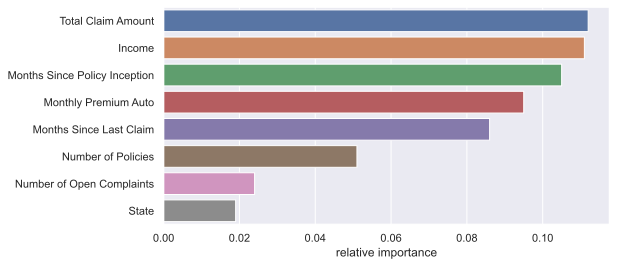

In [24]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp[:8], index=X.columns[:8]).sort_values(ascending = False)

plt.figure(dpi=200,figsize=(8,4))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()